In [6]:
!pip install pyreadr 
!pip install pandas 
!pip install rpy2 
!pip install seaborn
!pip install  matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr

In [3]:
def load_rda(file_paths):

  dataframes = {}

  for file_path in file_paths:
      result = pyreadr.read_r(file_path)

      for key in result.keys():
          dataframes[key] = result[key]

  return dataframes

In [4]:
def missing_values(df):
  return(df.isnull().sum())

In [5]:
def outlier_values(df):
    outliers = pd.Series(dtype="float64")

    for col in df.select_dtypes(include=["number"]):  # Sélectionner uniquement les colonnes numériques
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Détection des outliers
        mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = mask.mean() * 100  # Calcul du pourcentage

    return outliers

In [7]:
def plot_variable_distributions(dataframe, output_dir="plots"):
  import os

  # Créer le répertoire si nécessaire
  os.makedirs(output_dir, exist_ok=True)

  # Variables numériques
  for column in dataframe.select_dtypes(include='number').columns:
      plt.figure(figsize=(10, 6))
      sns.histplot(dataframe[column], kde=True, color="blue")
      plt.title(f"Distribution de {column}")
      plt.xlabel(column)
      plt.ylabel("Fréquence")
      # plt.savefig(f"{output_dir}/distribution_{column}.png")
      # plt.close()
      plt.show()
      
  # Variables catégoriques
  for column in dataframe.select_dtypes(include='category').columns:
      plt.figure(figsize=(10, 6))
      sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index)
      plt.title(f"Distribution de {column}")
      plt.xlabel("Fréquence")
      plt.ylabel(column)
      # plt.savefig(f"{output_dir}/distribution_{column}.png")
      # plt.close()
      plt.show()



In [8]:
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include='number').columns
    plt.figure(figsize=(15, 10))

    # Créer un boxplot pour chaque variable numérique
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


In [9]:
def clean_data(data_dict):
    cleaned_dict = {}
    for key, df in data_dict.items():
        df_cleaned = df.drop_duplicates()
        if 'RecordBeg' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordBeg'] = pd.to_datetime(df_cleaned['RecordBeg'], errors='coerce')
        if 'RecordEnd' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordEnd'] = pd.to_datetime(df_cleaned['RecordEnd'], errors='coerce')

        cleaned_dict[key] = df_cleaned

    return cleaned_dict

In [22]:
file_paths = ['beMTPL16.rda']

In [23]:
print(file_paths)

['beMTPL16.rda']


In [24]:
df = load_rda(file_paths)

In [25]:
df1 = clean_data(df)

In [26]:
df1['beMTPL16'].head()

,insurance_contract,policy_year,exposure,insured_birth_year,vehicle_age,policy_holder_age,driver_license_age,vehicle_brand,vehicle_model,mileage,vehicle_power,catalog_value,claim_value,number_of_liability_claims,number_of_bodily_injury_liability_claims,claim_time,claim_responsibility_rate,driving_training_label,signal
0,C1,1,0.386301,1945,10,9,40,MERCEDES,ME-1245,30000,75,983732,2,0,0,00:00,0,No,0
1,C2,1,0.493151,1941,4,25,24,VOLKSWAGEN,VO-2461,30000,55,510562,8,0,0,07:45,0,No,0
2,C3,1,0.290411,1944,0,2,39,AUDI,AU-967,30000,120,1934768,10,0,0,00:00,0,No,0
3,C4,1,0.336986,1948,1,14,37,LANCIA,LA-2346,30000,51,536755,13,0,0,18:50,0,No,0
4,C5,1,0.219178,1928,3,7,59,CITROEN,CI-1258,30000,54,446725,14,0,0,00:00,100,No,0


#### Retirons les variables non pertinentes  

In [27]:
columns_to_remove = ["insurance_contract","vehicle_model", "claim_time", "vehicle_brand"]
df1['beMTPL16'] = df1['beMTPL16'].drop(columns=columns_to_remove, errors='ignore')

In [28]:
df1['beMTPL16'].dtypes

policy_year                                    int32
exposure                                     float64
insured_birth_year                             int32
vehicle_age                                    int32
policy_holder_age                              int32
driver_license_age                             int32
mileage                                        int32
vehicle_power                                  int32
catalog_value                                  int32
claim_value                                    int32
number_of_liability_claims                     int32
number_of_bodily_injury_liability_claims       int32
claim_responsibility_rate                      int32
driving_training_label                      category
signal                                         int32
dtype: object

In [29]:
outlier_values(df1['beMTPL16'] )

policy_year                                 0.000000
exposure                                    0.211891
insured_birth_year                          0.098883
vehicle_age                                 1.385769
policy_holder_age                           0.459098
driver_license_age                          9.165007
mileage                                     8.070235
vehicle_power                               3.240525
catalog_value                               1.298188
claim_value                                 0.000000
number_of_liability_claims                  0.000000
number_of_bodily_injury_liability_claims    1.991779
claim_responsibility_rate                   0.000000
signal                                      0.063567
dtype: float64

Faible taux de valeurs manquantes pour chaque variables de notre base

In [30]:
df1['beMTPL16'].describe().round(2)

,policy_year,exposure,insured_birth_year,vehicle_age,policy_holder_age,driver_license_age,mileage,vehicle_power,catalog_value,claim_value,number_of_liability_claims,number_of_bodily_injury_liability_claims,claim_responsibility_rate,signal
count,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00
mean,2.50,0.44,1941.39,6.16,9.65,38.20,28327.82,77.96,582385.34,80780.79,0.35,0.02,48.42,0.00
std,1.11,0.18,6.96,4.80,6.79,9.55,5711.13,29.63,546006.98,45999.89,0.48,0.14,49.63,0.03
min,1.00,0.20,1911.00,0.00,0.00,0.00,2500.00,30.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,2.00,0.29,1936.00,2.00,4.00,34.00,30000.00,55.00,0.00,41491.50,0.00,0.00,0.00,0.00
50%,3.00,0.40,1943.00,5.00,9.00,41.00,30000.00,74.00,550600.00,82430.00,0.00,0.00,0.00,0.00
75%,3.00,0.56,1947.00,9.00,14.00,43.00,30000.00,92.00,867766.50,120472.00,1.00,0.00,100.00,0.00
max,4.00,1.00,1952.00,60.00,30.00,60.00,30000.00,487.00,7234528.00,169694.00,1.00,1.00,100.00,1.00


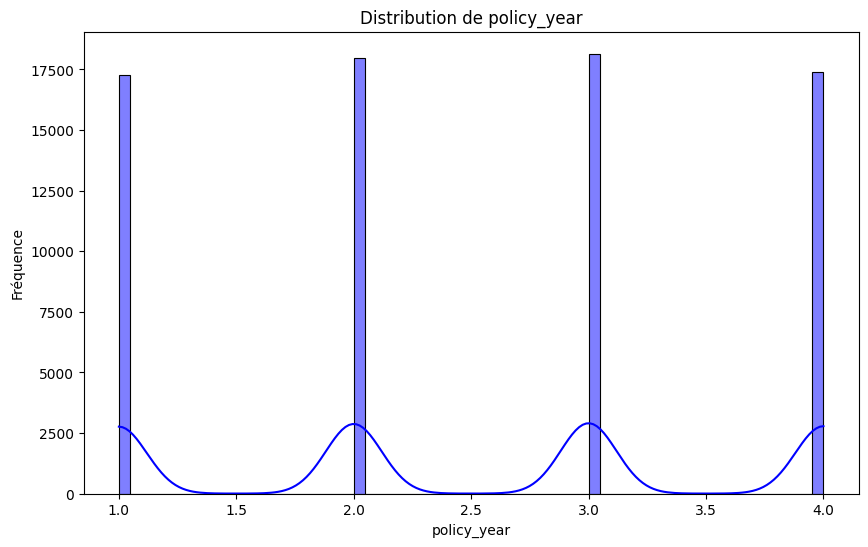

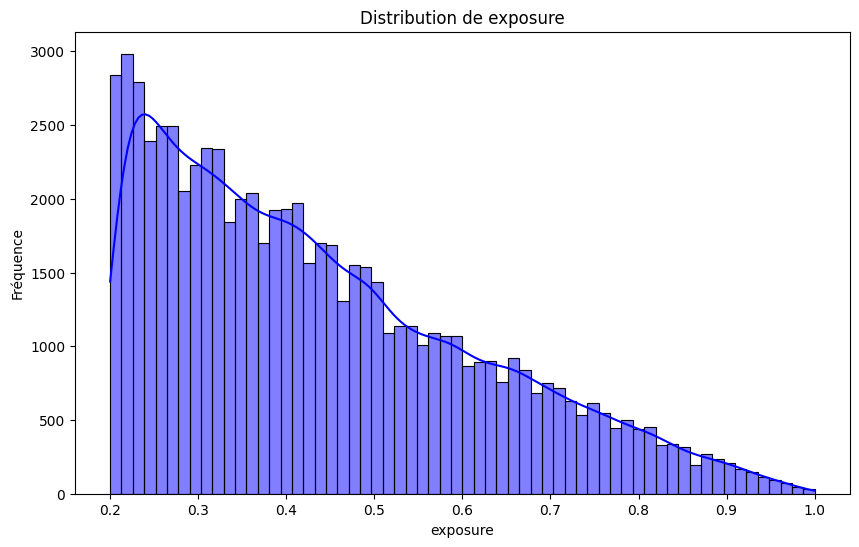

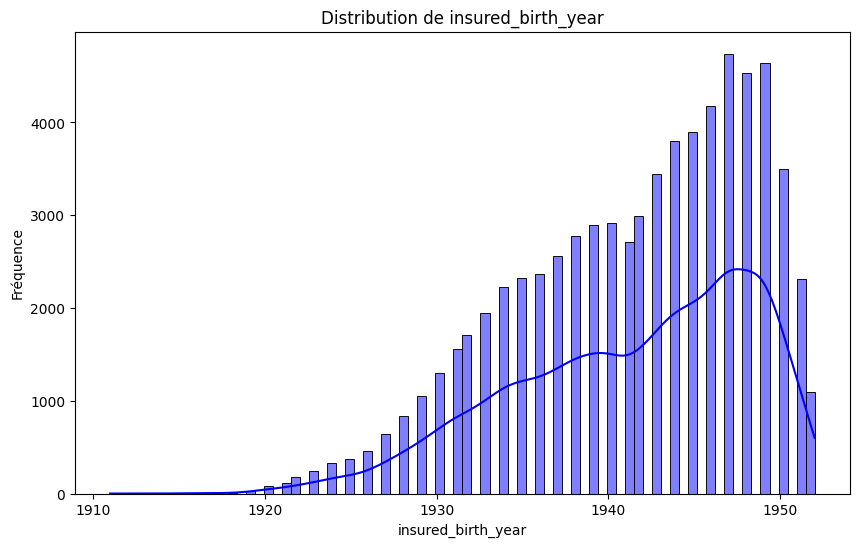

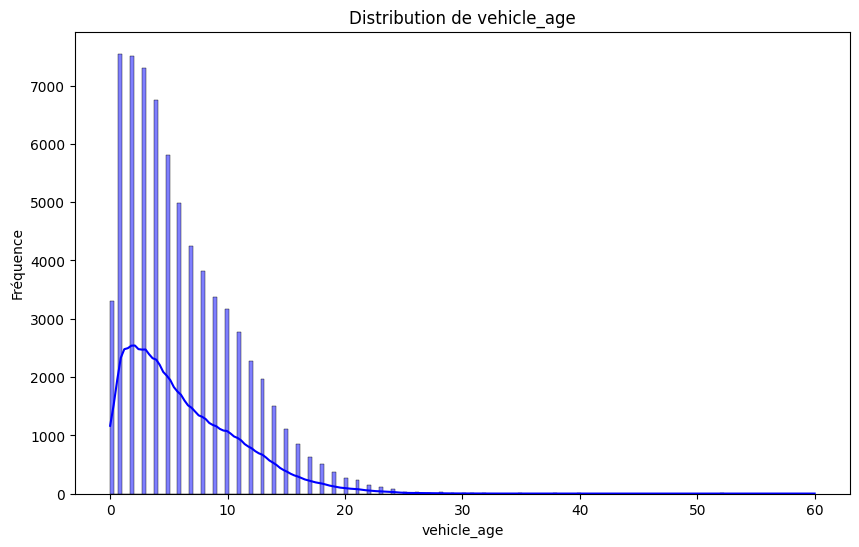

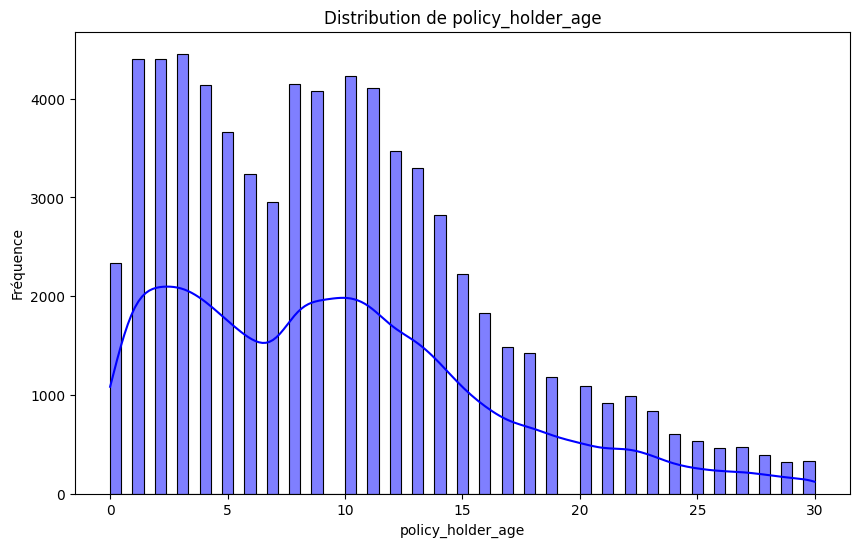

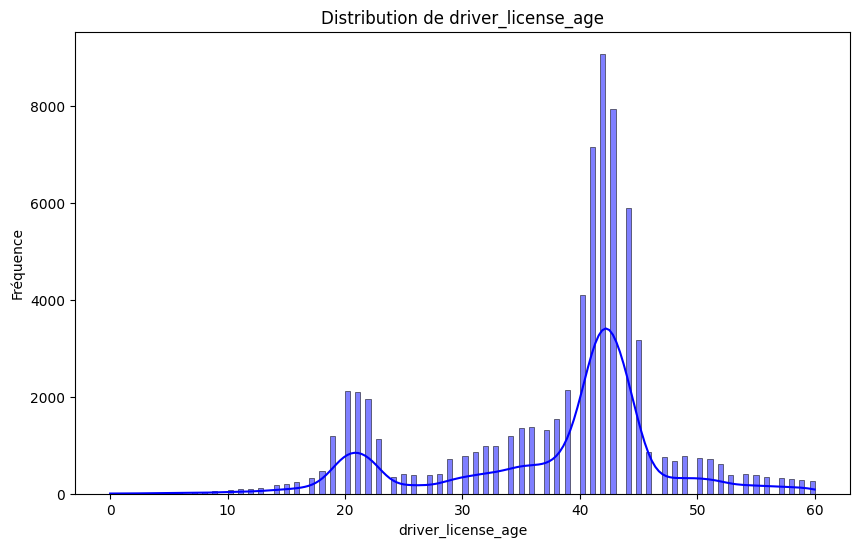

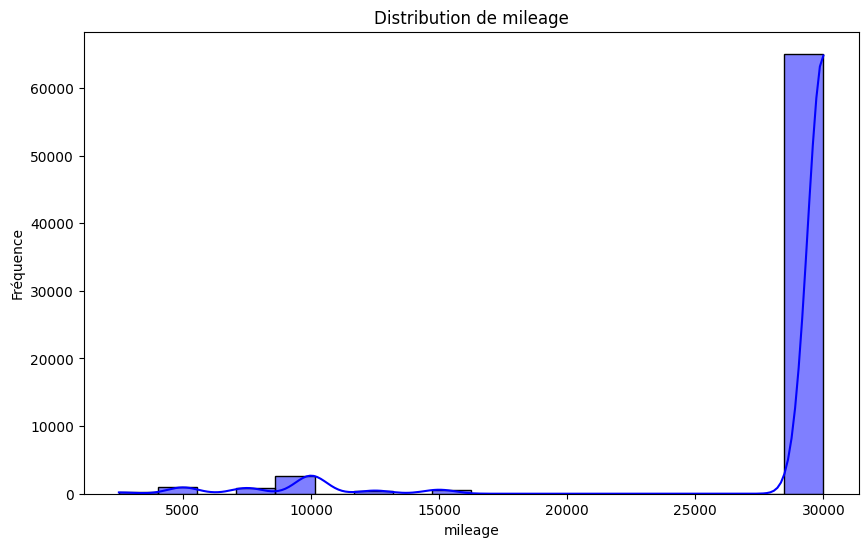

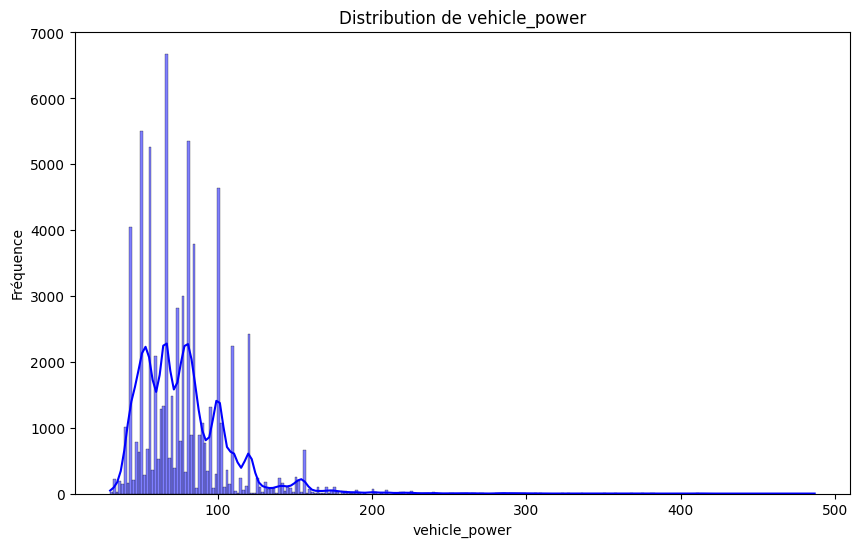

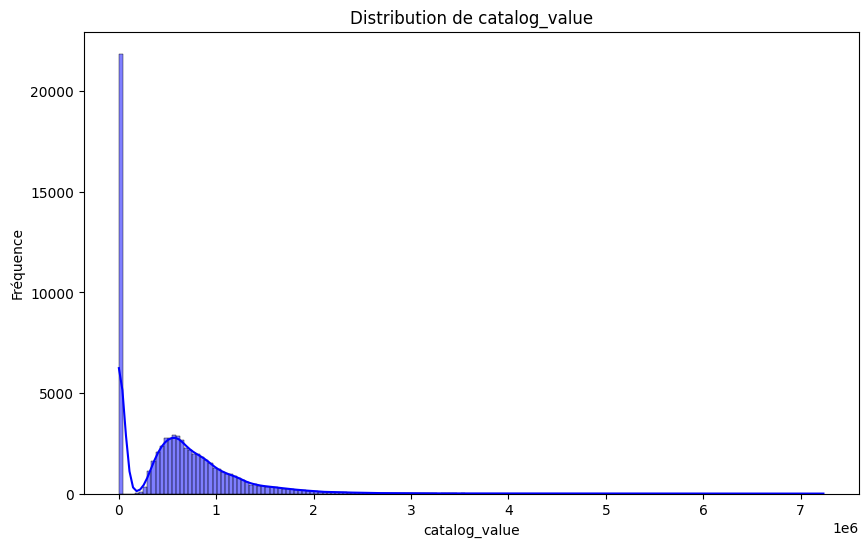

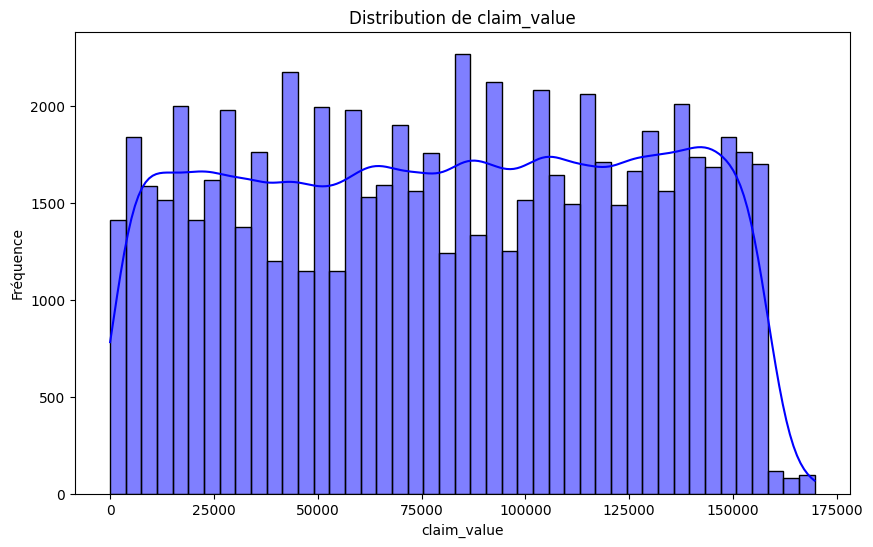

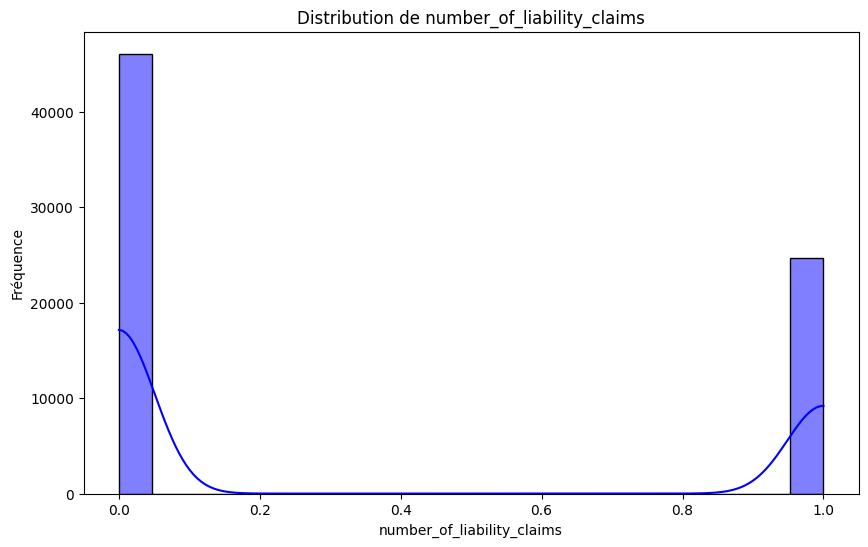

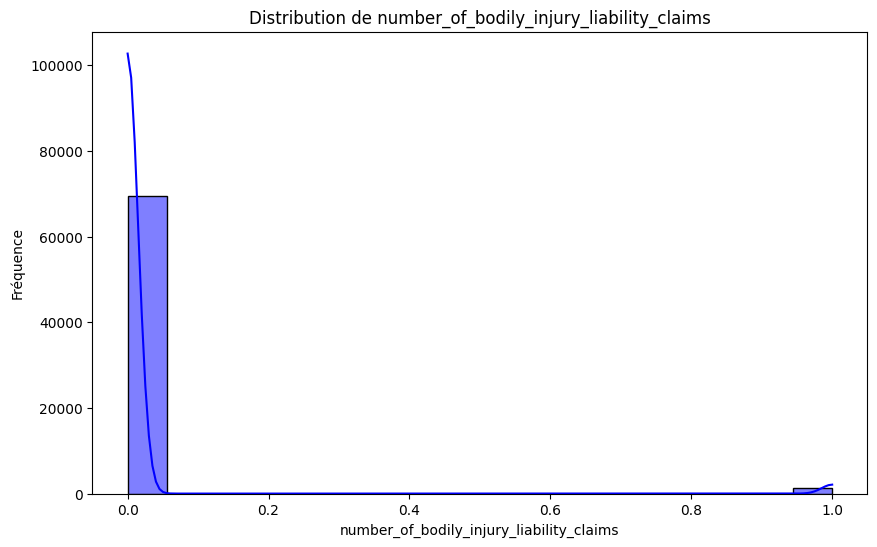

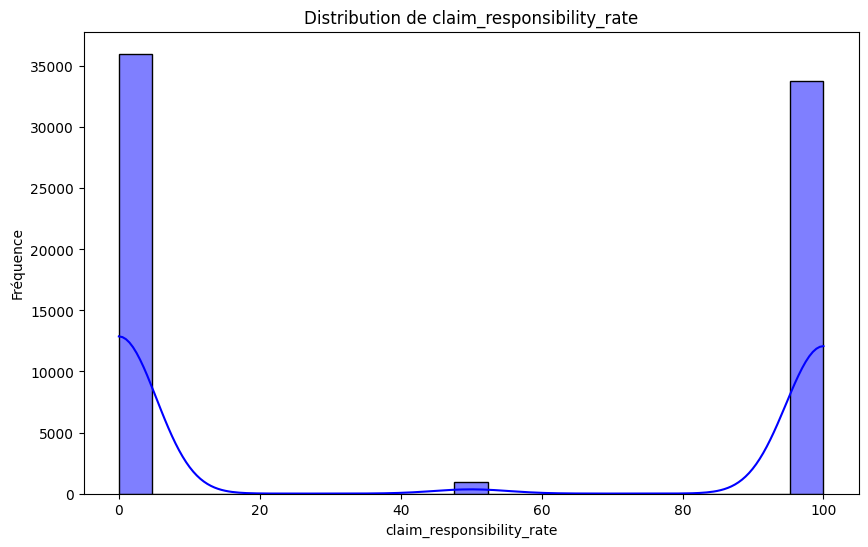

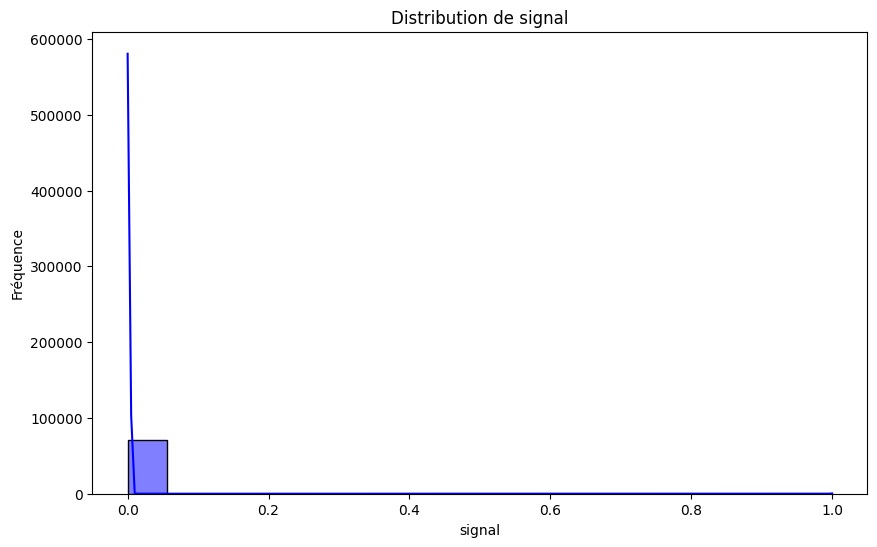

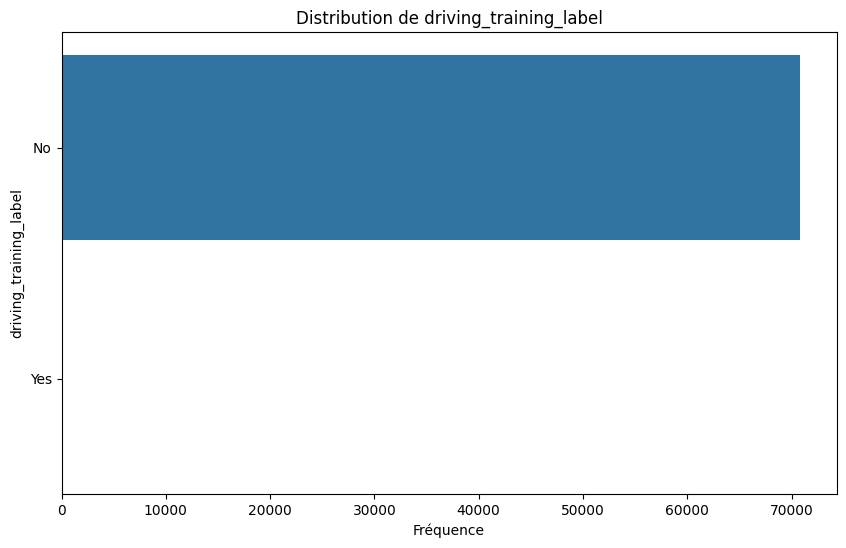

In [29]:
plot_variable_distributions(df1['beMTPL16'])

In [31]:
df1['beMTPL16'].select_dtypes(include='number').columns


Index(['policy_year', 'exposure', 'insured_birth_year', 'vehicle_age',
       'policy_holder_age', 'driver_license_age', 'mileage', 'vehicle_power',
       'catalog_value', 'claim_value', 'number_of_liability_claims',
       'number_of_bodily_injury_liability_claims', 'claim_responsibility_rate',
       'signal'],
      dtype='object')

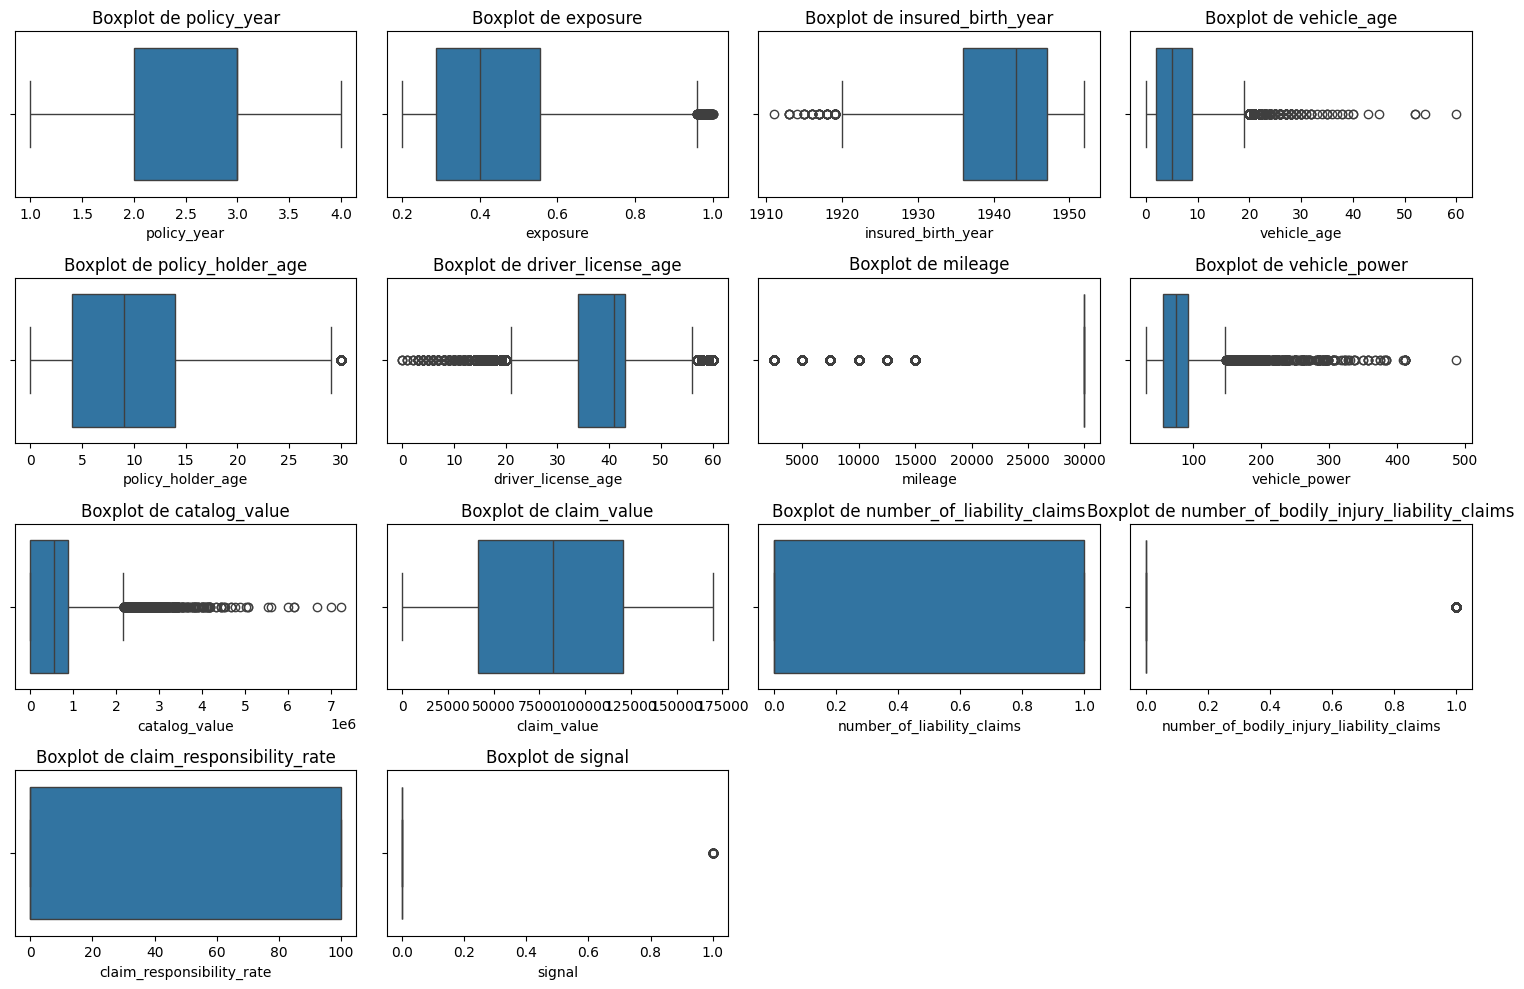

In [30]:
plot_boxplots(df1['beMTPL16'])

### Variables non pertinentes: insurance_contract, vehicle_model, claim_time, vehicle_brand

## 🏢 **Variables liées au contrat d’assurance**  

### **policy_year (Année du contrat)**  
- Moyenne : **2,5 ans** → Les contrats ont une durée moyenne de **2 à 3 ans**.  
### **exposure**
- Une mesure du temps pendant lequel l’assuré était exposé au risque (valeurs entre **0,2 et 1**).  
- Moyenne : **0,44** → Indique que en moyenne de nombreux contrats ne couvrent pas une année complète.  
- Une exposition plus longue implique un risque plus élevé de déclarer un sinistre.  


## 👤 ** Variables liées à l’assuré**  

### **insured_birth_year**
- Moyenne : **1941** → Cela signifie que les conducteurs sont en moyenne âgés.    

### **policy_holder_age **
- Moyenne : **9,65 ans** → Cette valeur semble incohérente car représente l'âge du souscripteur (probablement en année d’assurance ou une transformation des données).   

### **driver_license_age **
- Moyenne : **38,2 ans** → Conducteurs expérimentés en moyenne.  
- Min-Max : **0 à 60 ans** → Certains assurés n'ont peut-être pas de permis enregistré dans la base, ou il y a des erreurs de données.  

## 🚗 **Variables liées au véhicule**  

### **vehicle_age (Âge du véhicule en années)**
- Moyenne : **6,16 ans** → Flotte automobile relativement récente.  
- Min-Max : **0 à 60 ans** → Certains véhicules sont anciens, ce qui peut impacter leur fiabilité et le risque d’accident.  

### **mileage**
- Moyenne : **28 327 km/an** → Conducteurs parcourant une distance significative.  
- Min-Max : **2 500 km – 30 000 km** → Les petits rouleurs et les gros rouleurs sont bien représentés.  
- Un kilométrage élevé peut être associé à un **risque accru** d’accidents.  

### **vehicle_power**
- Moyenne : **77,96 chevaux** → Véhicules d’une puissance modérée en moyenne.  
- Min-Max : **30 à 487 chevaux** → Présence de véhicules très puissants, qui peuvent être associés à un **risque plus élevé de sinistres**.  


## 📉 **Variables liées aux sinistres**  

### **claim_value**
- Moyenne : **80 780** unités monétaires.  
- Min-Max : **0 à 169 694** → Beaucoup de contrats sans sinistre, mais des montants élevés pour ceux qui en ont.    

### **number_of_liability_claims **
- Moyenne : **0,35** → La plupart des assurés n’ont pas eu de sinistre.   

### **number_of_bodily_injury_liability_claims **
- Moyenne : **0,0199** → Très peu de sinistres corporels dans l’ensemble.   

### **claim_responsibility_rate **
- Moyenne : **48,42%** → Près de la moitié des sinistres impliquent une responsabilité partielle ou totale.  
- Certains assurés ont **100% de responsabilité**, ce qui peut justifier une **majoration de leur prime**.   

### **signal **
- Valeurs très faibles (**0,025% de 1**) → Très peu de sinistres dans l’échantillon.   